In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import glob
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

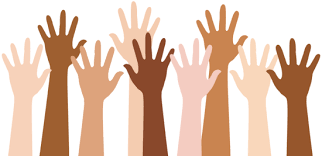

 # Hand movement classification

The purpose of the work is to classify between three different situations in the way people communicate with each other. 
The idea is to look at the patterns of the hands and try to deduce from them whether it is a situation alone, spontaneous or synchronous.

 -  Alone mode: Each participant, in their turn, is asked to move their hand freely over the Leap-Motion controller.

 - Spontaneous mode: The two participants can see each others' movement during the experiment.

 - Synchronization mode: The two participants are asked to moved in synchronization.

### The features in the data:

In [4]:
Columns = ['Time', 'Frame ID','Hand Type' , '# hands', 'Position X', 
            'Position Y', 'Position Z', 'Velocity X', 'Velocity Y', 
            'Velocity Z', 'Pitch', 'Roll', 'Yaw', 'Wrist Pos X', 
            'Wrist Pos Y', 'Wrist Pos Z', 'Elbow pos X', 'Elbow Pos Y', 
            'Elbow Pos Z', 'Grab Strenth', 'Grab Angle', 'Pinch Strength']
print(* Columns, sep='\n')

Time
Frame ID
Hand Type
# hands
Position X
Position Y
Position Z
Velocity X
Velocity Y
Velocity Z
Pitch
Roll
Yaw
Wrist Pos X
Wrist Pos Y
Wrist Pos Z
Elbow pos X
Elbow Pos Y
Elbow Pos Z
Grab Strenth
Grab Angle
Pinch Strength


## Let's upload the training data:

In [5]:
address = r'/Users/nnussbaum/Ariel/extraFiles/Training/'

Let's create a few functions to help us import the data:

This function will remove the first 7 seconds from each data frame, merge the data frames and make the hand type 0 or 1

In [11]:
def dfBuilder(files):
    li = []
    for i, name in enumerate(files):
        folder = glob.glob(name + "/*.csv")
        label = ["Spontan", "Sync" , "Alone"]
        for filename in folder:
            df = pd.read_csv(filename, index_col=None, header=0)
            for j, labels in enumerate(label):
                if labels in filename:
                    df["Label"] = j
                    df["Name"] = i
                    df = (df[df["Time"] > (df["Time"][0]+7)])
            li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
    frame.loc[(frame[' Hand Type'] == 'left') , " Hand Type"] = int(0)
    frame.loc[(frame[' Hand Type'] == 'right') , " Hand Type"] = int(1)
    frame[' Hand Type'] = frame[' Hand Type'].astype(int)
    return frame

Let's upload the data and delete any rows that have two hands when there should be one, and one when there should be two 

In [12]:
address = glob.glob(r'/Users/nnussbaum/Ariel/extraFiles/Training/' + "/*")
frame = dfBuilder(address)
hold = frame[(frame[' # hands']!=1) | (frame['Label']==2)]
frame = hold[(hold[' # hands']==1 ) | (hold['Label']!=2)]
frame.head(10)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Label,Name
0,619.9325,71525,0,1,-125.9596,168.4602,-27.114670,265.82160,-326.39930,241.7092,...,118.5998,-8.304316,-364.7364,-32.55849,85.38065,0.0,0.000000,0.0,2,0
1,619.9495,71527,0,1,-123.4033,165.2152,-24.034270,123.02550,-172.08610,171.8766,...,116.1477,-6.489561,-366.1621,-29.70646,89.85723,0.0,0.000000,0.0,2,0
2,619.9656,71529,0,1,-119.4215,159.7905,-20.979390,204.39310,-283.77100,153.4038,...,113.0303,-5.492952,-369.1355,-25.86688,92.54630,0.0,0.000000,0.0,2,0
3,619.9825,71531,0,1,-117.6987,156.9946,-18.672850,104.39600,-135.59880,124.5371,...,111.5442,-4.709237,-371.1240,-23.94903,93.60573,0.0,0.000000,0.0,2,0
4,619.9995,71533,0,1,-114.6961,152.9964,-15.699020,118.92250,-159.14510,166.9148,...,111.4075,-4.421209,-375.1566,-23.01028,88.07614,0.0,0.000000,0.0,2,0
5,620.0154,71535,0,1,-114.0516,151.1051,-12.367970,77.81772,-161.02190,198.4248,...,113.7657,-3.468150,-381.8506,-22.76634,75.90390,0.0,0.035190,0.0,2,0
6,620.0324,71536,0,1,-113.0556,149.4217,-10.467600,115.10040,-194.51480,219.5945,...,113.3798,-2.931238,-384.1937,-23.40184,69.47894,0.0,0.096545,0.0,2,0
7,620.0485,71538,0,1,-112.9368,146.4524,-6.776668,-50.17619,-73.27056,219.2248,...,115.2849,-1.923731,-387.0169,-26.66047,58.95325,0.0,0.171622,0.0,2,0
8,620.0653,71540,0,1,-112.1661,143.3890,-3.413068,10.07872,-116.69510,183.8517,...,117.2872,-1.336222,-388.7102,-27.80871,50.35883,0.0,0.414857,0.0,2,0
9,620.0815,71542,0,1,-110.8061,141.5307,-0.763288,199.56670,-241.62670,142.7272,...,120.7500,-1.093778,-388.9531,-26.04114,45.70087,0.0,0.589233,0.0,2,0


These functions create an alone dataframe and the not alone dataframe

In [13]:
def unlonely(df):
    not_alone = df[df['Label']!=2]
    L = not_alone[(not_alone[' Hand Type'] == 0)]
    R = not_alone[(not_alone[' Hand Type'] == 1)]
    L = L.set_index(['Time', 'Name'])
    R = R.set_index(['Time', 'Name'])
    R.columns += "_"
    not_alone = pd.concat([L, R], axis=1)
    not_alone.reset_index(inplace= True)
    not_alone.drop(["Name","Label_"],axis=1, inplace=True)
    return not_alone

def loner(df):
    HandRight = pd.read_csv(r'/Users/nnussbaum/Ariel/extraFiles/HandRight.csv', index_col=None, header=0)
    # drop rows with nan value
    HandRight.dropna(inplace= True)
    # drop errors
    HandRight = HandRight[HandRight[" Hand Type"] == "right"]
    HandRight.reset_index(inplace= True, drop = True)
    alone = df[df['Label']==2]
    # adding Right hand for each one and merge.
    temp_list = []
    right = HandRight
    right.columns += "_"
    for i in range(9):
        left = alone[alone["Name"] == i]
        left.reset_index(inplace= True, drop = True)
        temp_list.append(pd.concat([left, right], axis=1, ignore_index= False).dropna())
    alone = pd.concat(temp_list, axis=0, ignore_index=True)
    # delete Name from "Alone" 
    alone.drop(["Name","Time_"], axis=1, inplace=True)
    return alone

Let's merge all the dataframes and use every 5th row

In [14]:
alone = loner(frame)
not_alone = unlonely(frame)
df = pd.concat([not_alone, alone], axis=0, ignore_index=True)
df = df.drop(['Time', ' Frame ID',' Hand Type',' # hands',' Hand Type_',' # hands_',' Frame ID_'], axis=1)
df = df[::5]
df.head(10)

,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,...,Yaw_,Wrist Pos X_,Wrist Pos Y_,Wrist Pos Z_,Elbow pos X_,Elbow Pos Y_,Elbow Pos Z_,Grab Strenth_,Grab Angle_,Pinch Strength_
0,-234.4118,310.6206,98.67302,5.863666,-75.43589,21.82626,1.655058,1.413536,2.236143,-246.8160,...,-1.453105,164.23190,219.8187,136.1714,351.4926,43.255690,140.2875,0.0,0.362115,0.0
5,-230.4686,299.7511,96.22263,125.115800,-214.90050,-90.16359,1.655171,1.381551,2.082474,-245.4881,...,-1.423832,166.85890,192.8080,139.6375,357.2802,20.227450,154.2542,0.0,0.235735,0.0
10,-219.9927,284.4402,90.27637,43.983890,-166.22880,-72.66569,1.625396,1.313177,1.794219,-240.9314,...,-1.397804,162.72630,172.5343,137.7823,365.6625,14.559910,148.6883,0.0,0.192693,0.0
15,-226.0896,265.4039,85.48471,-173.576300,-158.78600,-13.59014,1.606664,1.151842,1.652647,-258.5863,...,-1.381654,151.51750,159.4752,131.8577,360.7501,10.298730,146.8942,0.0,0.107179,0.0
20,-222.9279,254.9596,81.67963,170.943700,-92.12617,-79.70767,1.719695,1.128994,1.884814,-256.3110,...,-1.397789,136.24270,152.3073,125.0084,344.5157,6.229396,164.2711,0.0,0.030530,0.0
25,-197.7769,229.3724,72.40764,236.027500,-232.14900,-62.71957,1.759099,1.047302,1.893630,-236.7881,...,-1.390451,120.80420,147.9635,118.4353,334.6621,11.591000,162.3137,0.0,0.065542,0.0
30,-184.2440,226.7764,74.71140,36.920600,138.46780,114.78170,1.817466,1.124777,2.079618,-217.3683,...,-1.407672,104.48890,150.2030,112.0260,315.1002,6.591621,147.7560,0.0,0.050888,0.0
35,-173.8440,230.4139,81.92075,156.120400,76.71689,91.61018,1.843718,1.108663,2.106277,-207.2250,...,-1.424502,91.74073,157.5298,106.2055,296.1790,1.596554,118.3635,0.0,0.058875,0.0
40,-163.0766,233.0863,88.73078,152.021500,57.80115,51.74406,1.858583,1.117195,2.150352,-195.6570,...,-1.435128,83.93373,170.7845,103.8518,286.7726,12.410720,109.5207,0.0,0.098319,0.0
45,-159.8284,246.8236,95.70956,39.721480,204.85430,115.31710,1.851669,1.163257,2.191299,-190.6456,...,-1.410141,81.67356,186.8285,107.2041,279.7205,22.624970,115.7242,0.0,0.129836,0.0


In [15]:
print(frame.shape)
print(frame.isna().any())

(296919, 24)
Time               False
 Frame ID          False
 Hand Type         False
 # hands           False
 Position X        False
 Position Y        False
 Position Z        False
 Velocity X        False
 Velocity Y        False
 Velocity Z        False
 Pitch             False
 Roll              False
 Yaw               False
 Wrist Pos X       False
 Wrist Pos Y       False
 Wrist Pos Z       False
 Elbow pos X       False
 Elbow Pos Y       False
 Elbow Pos Z       False
 Grab Strenth      False
 Grab Angle        False
 Pinch Strength    False
Label              False
Name               False
dtype: bool


In [16]:
print(frame.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296919 entries, 0 to 300396
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             296919 non-null  float64
 1    Frame ID        296919 non-null  int64  
 2    Hand Type       296919 non-null  int64  
 3    # hands         296919 non-null  int64  
 4    Position X      296919 non-null  float64
 5    Position Y      296919 non-null  float64
 6    Position Z      296919 non-null  float64
 7    Velocity X      296919 non-null  float64
 8    Velocity Y      296919 non-null  float64
 9    Velocity Z      296919 non-null  float64
 10   Pitch           296919 non-null  float64
 11   Roll            296919 non-null  float64
 12   Yaw             296919 non-null  float64
 13   Wrist Pos X     296919 non-null  float64
 14   Wrist Pos Y     296919 non-null  float64
 15   Wrist Pos Z     296919 non-null  float64
 16   Elbow pos X     296919 non-null  floa

## Let's upload the testing data:

In [17]:
address1 = glob.glob(r'/Users/nnussbaum/Ariel/extraFiles/Validation/' + "/*")
frame1 = dfBuilder(address1)
frame1.head(10)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Label,Name
0,153.3970,20542,1,2,116.75470,166.9477,-20.82885,25.88344,-24.250830,-33.90162,...,121.3219,29.08213,245.2854,-54.15136,159.41980,0.0,0.000000,0.000000,1,0
1,153.3970,20542,0,2,-77.03016,199.2262,18.11893,-16.44282,-10.225020,-41.09758,...,130.9721,17.86045,-169.9897,-93.44743,11.36950,0.0,0.449641,0.181469,1,0
2,153.4131,20544,1,2,116.80710,166.0322,-21.34337,2.35236,-52.896870,-28.08331,...,121.5414,29.58164,243.7403,-52.34761,163.38720,0.0,0.000000,0.000000,1,0
3,153.4131,20544,0,2,-76.84715,198.6608,17.40147,11.60777,-26.097500,-42.28217,...,130.3360,17.53547,-171.1309,-93.72797,10.93816,0.0,0.337501,0.159251,1,0
4,153.4296,20546,1,2,116.73900,165.0588,-21.79521,-10.11920,-59.440770,-24.87830,...,121.7375,30.14712,245.6555,-47.76900,167.77390,0.0,0.000000,0.000000,1,0
5,153.4296,20546,0,2,-76.18059,197.5708,16.54493,47.10982,-60.376890,-48.66555,...,129.1100,17.29883,-173.4897,-94.14534,11.39081,0.0,0.271751,0.162548,1,0
6,153.4462,20548,1,2,116.41550,163.9005,-22.19717,-21.00471,-66.302830,-23.33161,...,121.7746,30.68066,248.7033,-42.40138,171.97310,0.0,0.000000,0.000000,1,0
7,153.4462,20548,0,2,-75.41199,196.7055,15.70978,43.26208,-44.474460,-47.26429,...,128.1449,17.11410,-175.9467,-94.17613,12.78497,0.0,0.220099,0.119289,1,0
8,153.4628,20550,1,2,115.98850,162.8186,-22.57689,-23.71579,-58.768430,-20.20117,...,121.6797,30.99374,251.8123,-37.17968,175.55400,0.0,0.000000,0.000000,1,0
9,153.4628,20550,0,2,-74.87393,196.4057,14.88953,26.89678,-6.413064,-47.78307,...,127.7972,16.92846,-177.7725,-93.79881,14.30938,0.0,0.239776,0.115939,1,0


In [18]:
print(frame1.shape)
print(frame1.isna().any())

(81528, 24)
Time               False
 Frame ID          False
 Hand Type         False
 # hands           False
 Position X        False
 Position Y        False
 Position Z        False
 Velocity X        False
 Velocity Y        False
 Velocity Z        False
 Pitch             False
 Roll              False
 Yaw               False
 Wrist Pos X       False
 Wrist Pos Y       False
 Wrist Pos Z       False
 Elbow pos X       False
 Elbow Pos Y       False
 Elbow Pos Z       False
 Grab Strenth      False
 Grab Angle        False
 Pinch Strength    False
Label              False
Name               False
dtype: bool


In [19]:
print(frame1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81528 entries, 0 to 81527
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             81528 non-null  float64
 1    Frame ID        81528 non-null  int64  
 2    Hand Type       81528 non-null  int64  
 3    # hands         81528 non-null  int64  
 4    Position X      81528 non-null  float64
 5    Position Y      81528 non-null  float64
 6    Position Z      81528 non-null  float64
 7    Velocity X      81528 non-null  float64
 8    Velocity Y      81528 non-null  float64
 9    Velocity Z      81528 non-null  float64
 10   Pitch           81528 non-null  float64
 11   Roll            81528 non-null  float64
 12   Yaw             81528 non-null  float64
 13   Wrist Pos X     81528 non-null  float64
 14   Wrist Pos Y     81528 non-null  float64
 15   Wrist Pos Z     81528 non-null  float64
 16   Elbow pos X     81528 non-null  float64
 17   Elbow Pos Y

### A bit of visualization...

## Correlation chart

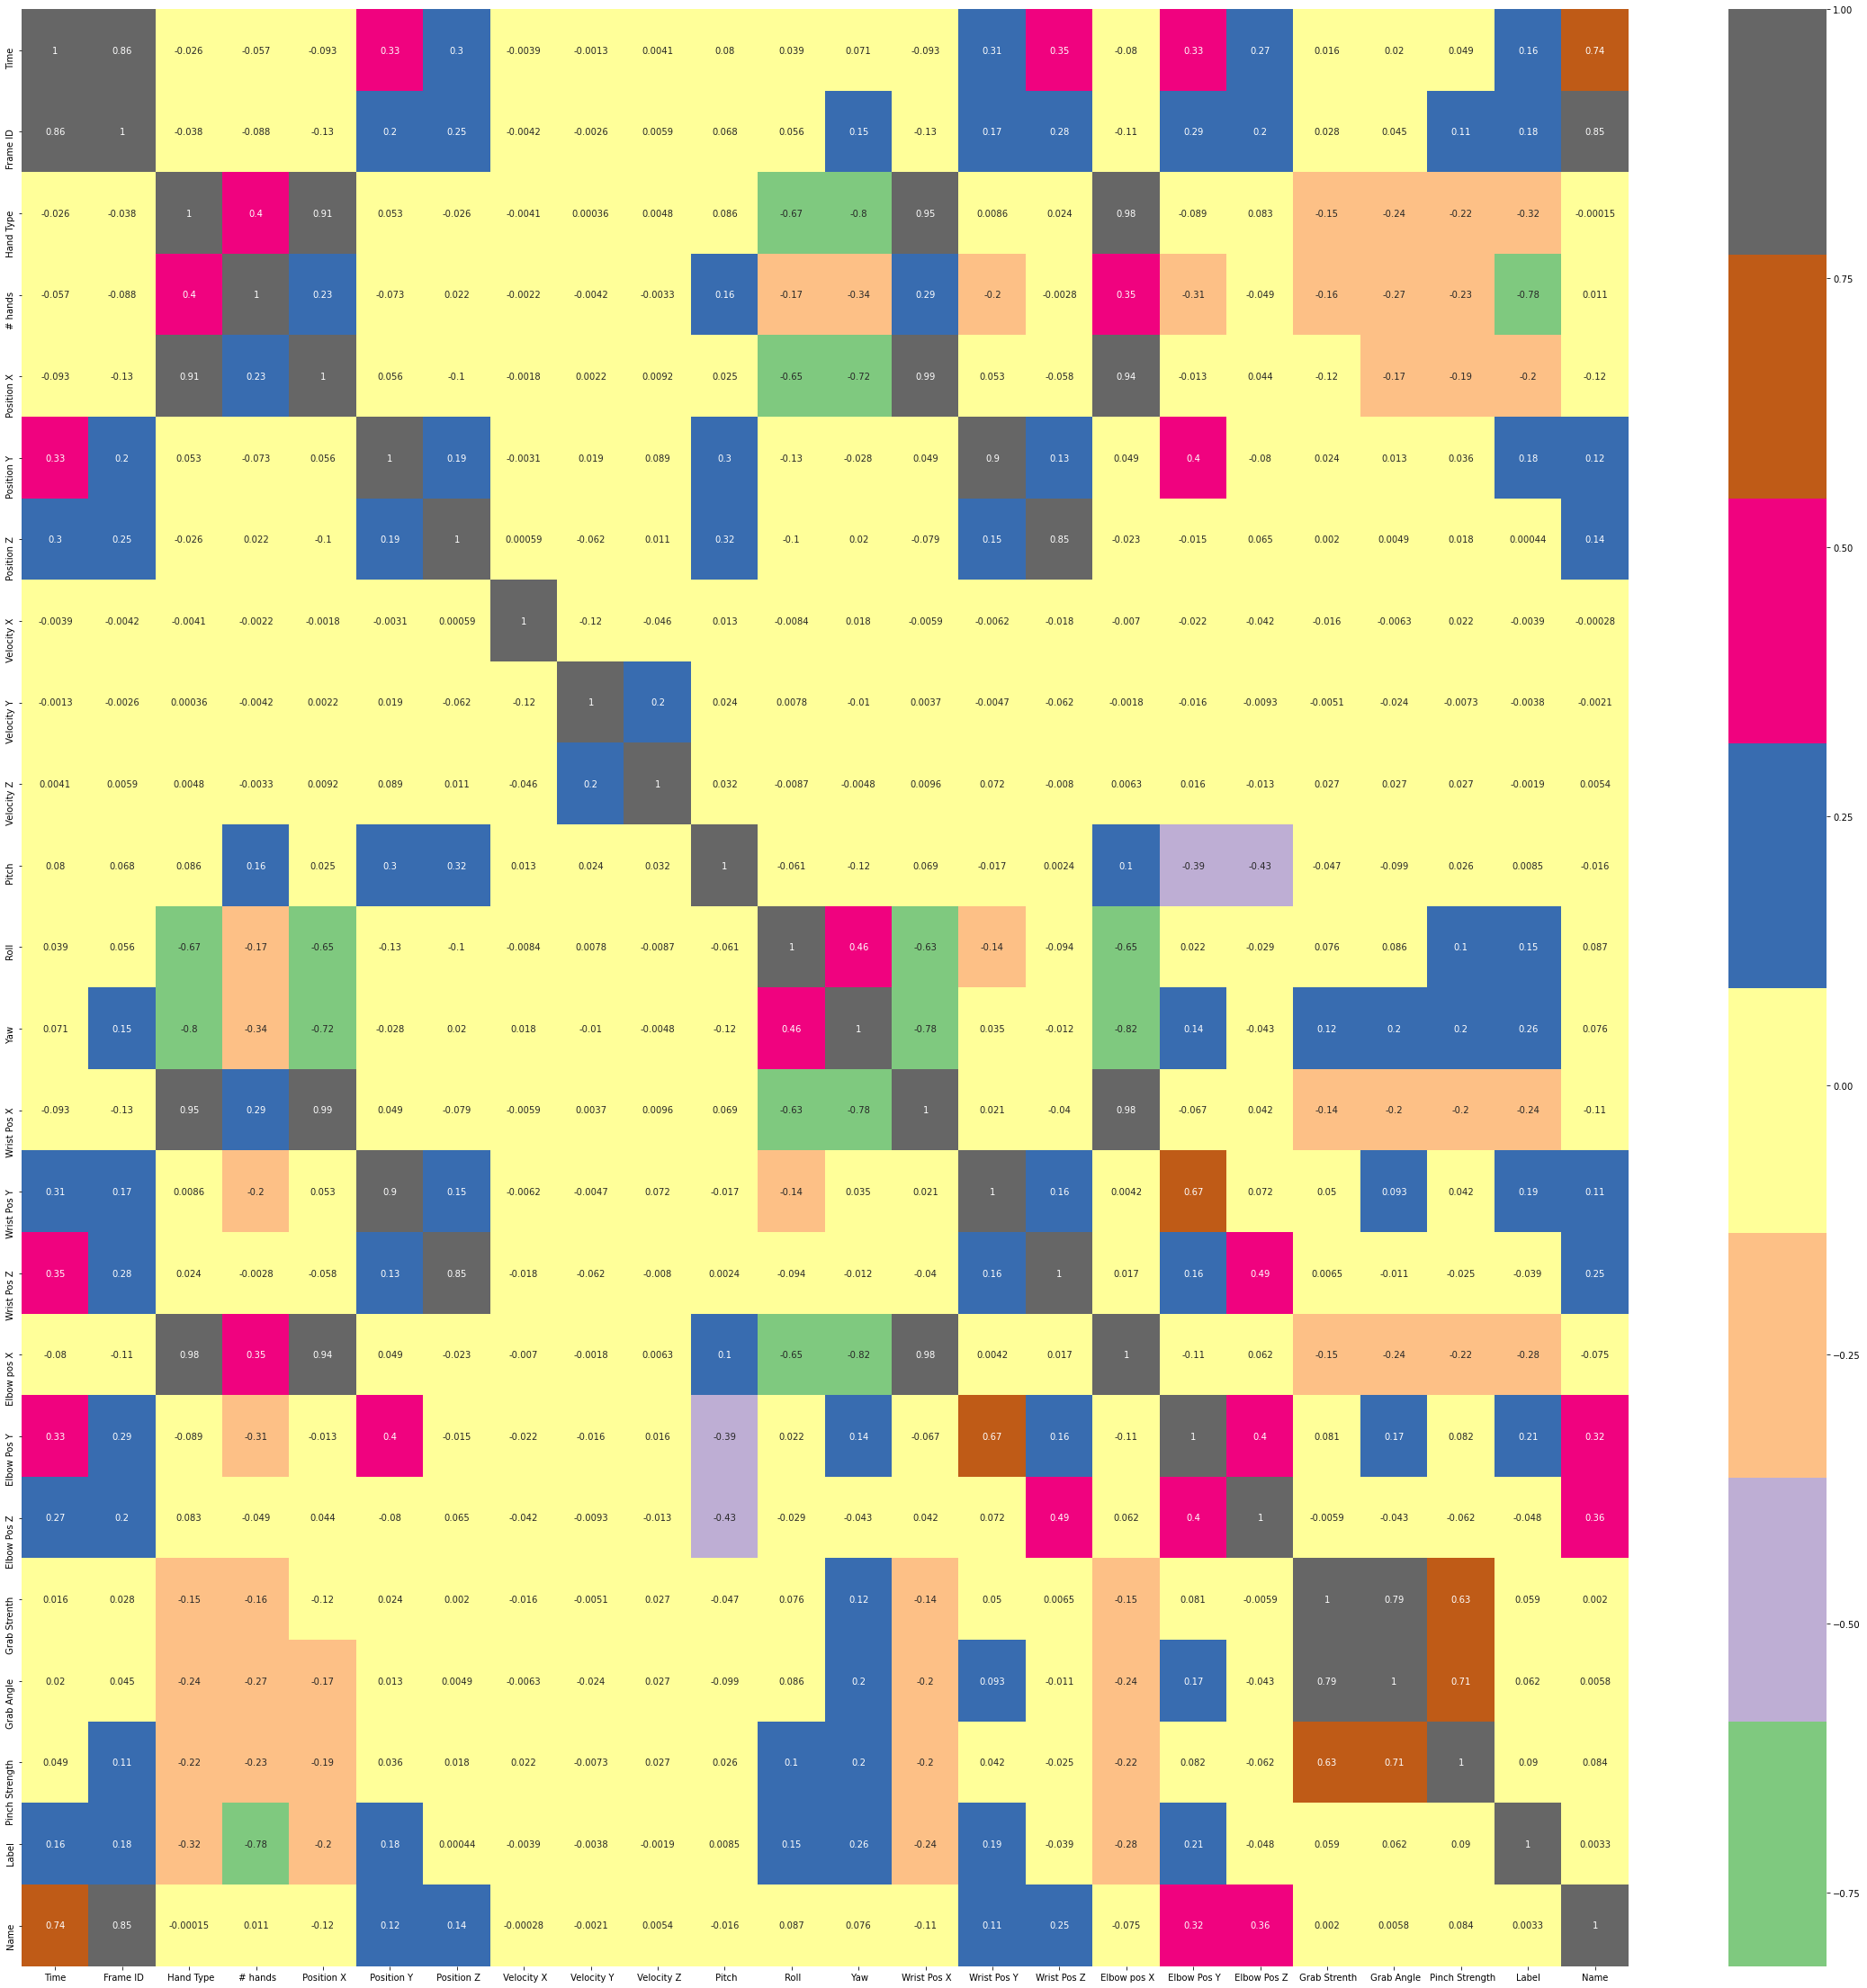

In [20]:
plt.figure(figsize=(40,40))
c= frame1.corr()
sns.heatmap(c,cmap="Accent",annot=True)
plt.show()

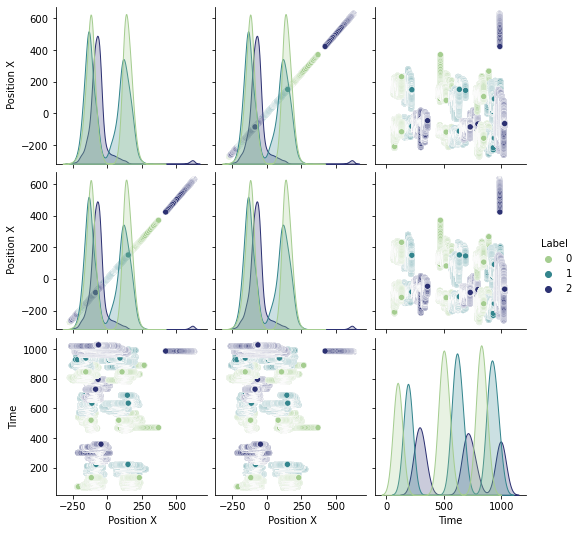

In [21]:
sns.pairplot(frame1,vars = [' Position X',' Position X','Time' ], hue='Label',palette="crest" )

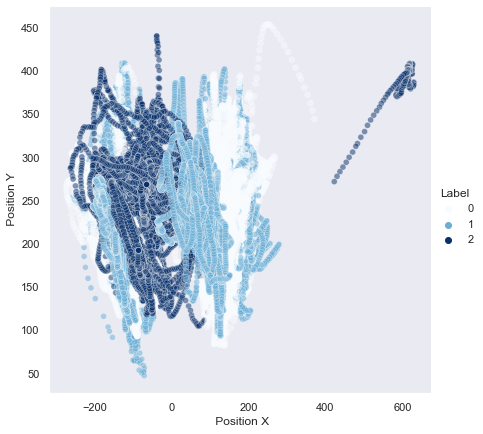

In [17]:
sns.set_theme(style="dark")
sns.relplot(x=" Position X", y=" Position Y", hue="Label",
            sizes=(40, 400), alpha=.5, palette="Blues",
            height=6, data=frame1)

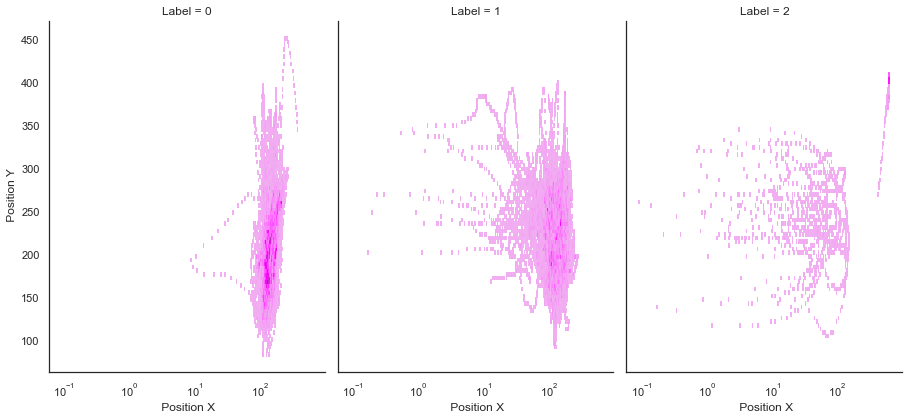

In [18]:
sns.set_theme(style="white")
sns.displot(
    data=frame1, x=" Position X", y=" Position Y", col="Label",
    log_scale=(True, False), col_wrap=4, height=6, aspect=.7, color='magenta'
)

## Divide data into training and testing sets

In [22]:
x = frame.drop('Label', axis = 1)
y = frame.Label

### Scaling and PCA

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.values)
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state=42, shuffle = True)
Kfolds = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)

# Let's begin modeling:

## Decision Tree Classifier

In [82]:
dtree = DecisionTreeClassifier(max_depth = 2, criterion='gini', max_features = 'log2')
dtree.fit(x_train, y_train)
prediction = dtree.predict(x_test)
dtc_a=accuracy_score(prediction,y_test)
print(dtc_a)

0.5770128878710314


Confusion matrix:

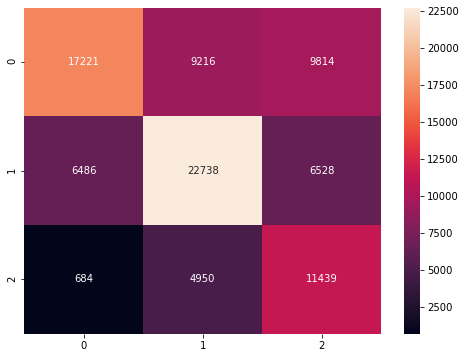

In [83]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Logistic Regression

In [33]:
logreg = LogisticRegression(max_iter = 200)
logreg.fit(x_train, y_train)
prediction = logreg.predict(x_test)
log_a = accuracy_score(prediction, y_test)
print(log_a)

0.6007454308680228


Confusion matrix:

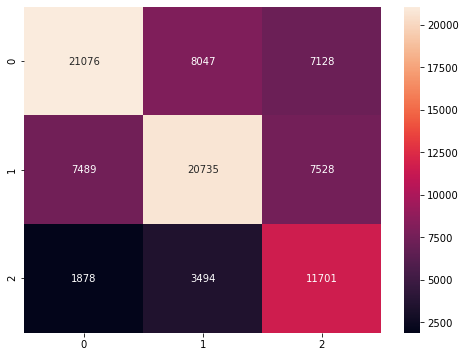

In [41]:
prediction = logreg.predict(x_test)
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

# Ensemble Learning models

## AdaBoost Classifier

In [37]:
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(x_train,y_train)
prediction = ada.predict(x_test)
ada_a = accuracy_score(y_test, prediction)
print(ada_a)

0.8072095738470519


Confusion matrix:

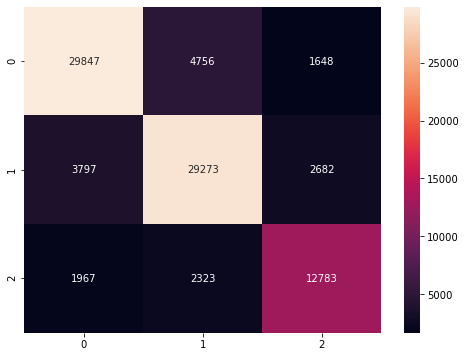

In [40]:
prediction = ada.predict(x_test)
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## GradientBoostingClassifier

In [46]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x_train,y_train)
prediction = gbc.predict(x_test)
gbc_a = accuracy_score(y_test, prediction)
print(gbc_a)

0.8811913422246171


Confusion matrix:

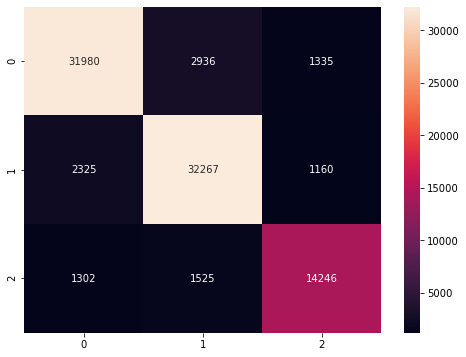

In [47]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## In summary:

# Model Accuracy Results Comparison

In [84]:
data = [[dtc_a*100, log_a*100, ada_a*100, gbc_a*100] ]
models=['Decision Tree', 'Logistic Regression','AdaBoost', 'Gradient Boosting']
pd.DataFrame(data, columns = models , index=["Accuracy Score (%)"])

,Decision Tree,Logistic Regression,AdaBoost,Gradient Boosting
Accuracy Score (%),57.701289,60.074543,80.720957,88.119134


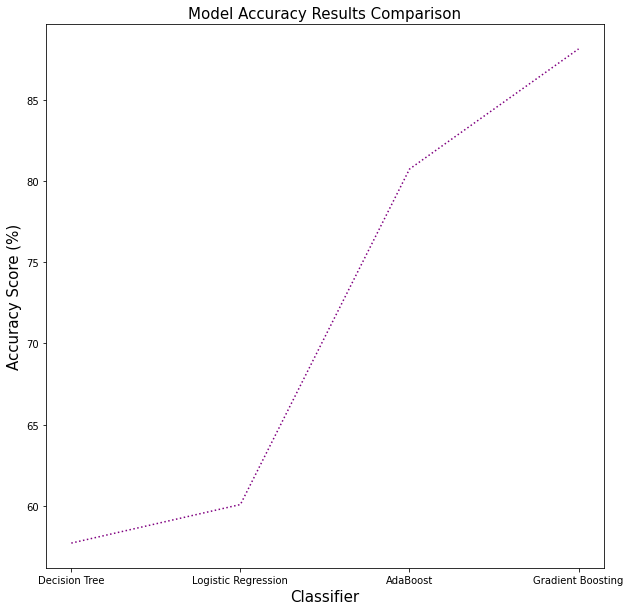

<Figure size 432x288 with 0 Axes>

In [93]:
models=['Decision Tree', 'Logistic Regression', 'AdaBoost', 'Gradient Boosting']
data = [ dtc_a*100, log_a*100, ada_a*100, gbc_a*100] 
plt.figure(figsize=(10,10))
plt.plot (models, data, linestyle=':',color='purple')
plt.title("Model Accuracy Results Comparison", fontsize = 15)
plt.xlabel("Classifier", fontsize=15)
plt.ylabel("Accuracy Score (%)", fontsize = 15)
plt.figure(facecolor='w', edgecolor='k')
plt.show()

### The best result we've achieved was 88%, using the Gradient Boosting Classifier

The end.